# Proyecto - Punto 1
Juliana Parra Caro - 1000613027 //
William Pinilla - 1000048878 //
Alejandro Duarte - 1001097142
1. Descarguen una variable de CMIP que les parezca interesante para la menos dos modelos y dos escenarios diferentes de cambio climatico, e incluyen el historico. Miren las anomalias, que tanti difieren, que se espera, y cual podria ser la incertidumbre al comparar modelos?

In [ ]:
#import cdsapi
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
'''

##Modelo ipsl_cm5a_mr

dataset = "sis-biodiversity-cmip5-global"
request = {
    "derived_variable": ["monthly_sum"],
    "model": ["ipsl_cm5a_mr"],
    "ensemble_member": ["r1i1p1"],
    "experiment": [
        "rcp4_5",
        "rcp8_5"
    ],
    "temporal_aggregation": ["monthly"],
    "version": ["1_0"],
    "variable": ["frost_days"]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()

## Modelo access1_0

dataset = "sis-biodiversity-cmip5-global"
request = {
    "derived_variable": ["monthly_sum"],
    "model": ["access1_0"],
    "ensemble_member": ["r1i1p1"],
    "experiment": [
        "rcp4_5",
        "rcp8_5"
    ],
    "temporal_aggregation": ["monthly"],
    "version": ["1_0"],
    "variable": ["frost_days"]
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()

'''




NameError: name 'cdsapi' is not defined

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
import os

file_list = [f for f in os.listdir('/content/') if f.endswith('.nc')]

dict_map={}
for filename in file_list:
    print(filename)

frost-days_monthly-sum_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0.nc
frost-days_monthly-sum_access1-0_rcp45_r1i1p1_1950-2100_v1.0.nc
frost-days_monthly-sum_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0.nc
frost-days_monthly-sum_access1-0_rcp85_r1i1p1_1950-2100_v1.0.nc


In [ ]:
import xarray as xr
import glob

path = '/home/estudiante/Descargas/UNAL_Seminars/datos/Frost_days_data'
file_list_glob = glob.glob(f'{path}*')

files = glob.glob(f'{path}*')

In [ ]:
import xarray as xr

ds_rcp45 = xr.open_dataset('/content/frost-days_monthly-sum_access1-0_rcp45_r1i1p1_1950-2100_v1.0.nc')
ds_rcp85 = xr.open_dataset('/content/frost-days_monthly-sum_access1-0_rcp85_r1i1p1_1950-2100_v1.0.nc')

In [ ]:
anomalies_rcp45 = ds_rcp45['frost-days'] - ds_rcp45['frost-days'].mean(dim='time')
anomalies_rcp85 = ds_rcp85['frost-days'] - ds_rcp85['frost-days'].mean(dim='time')

Se calculan las anomalias historicas para tomar de base y mostrar las anomalias con respecto a las proyecciones



/tmp/ipython-input-1853538169.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


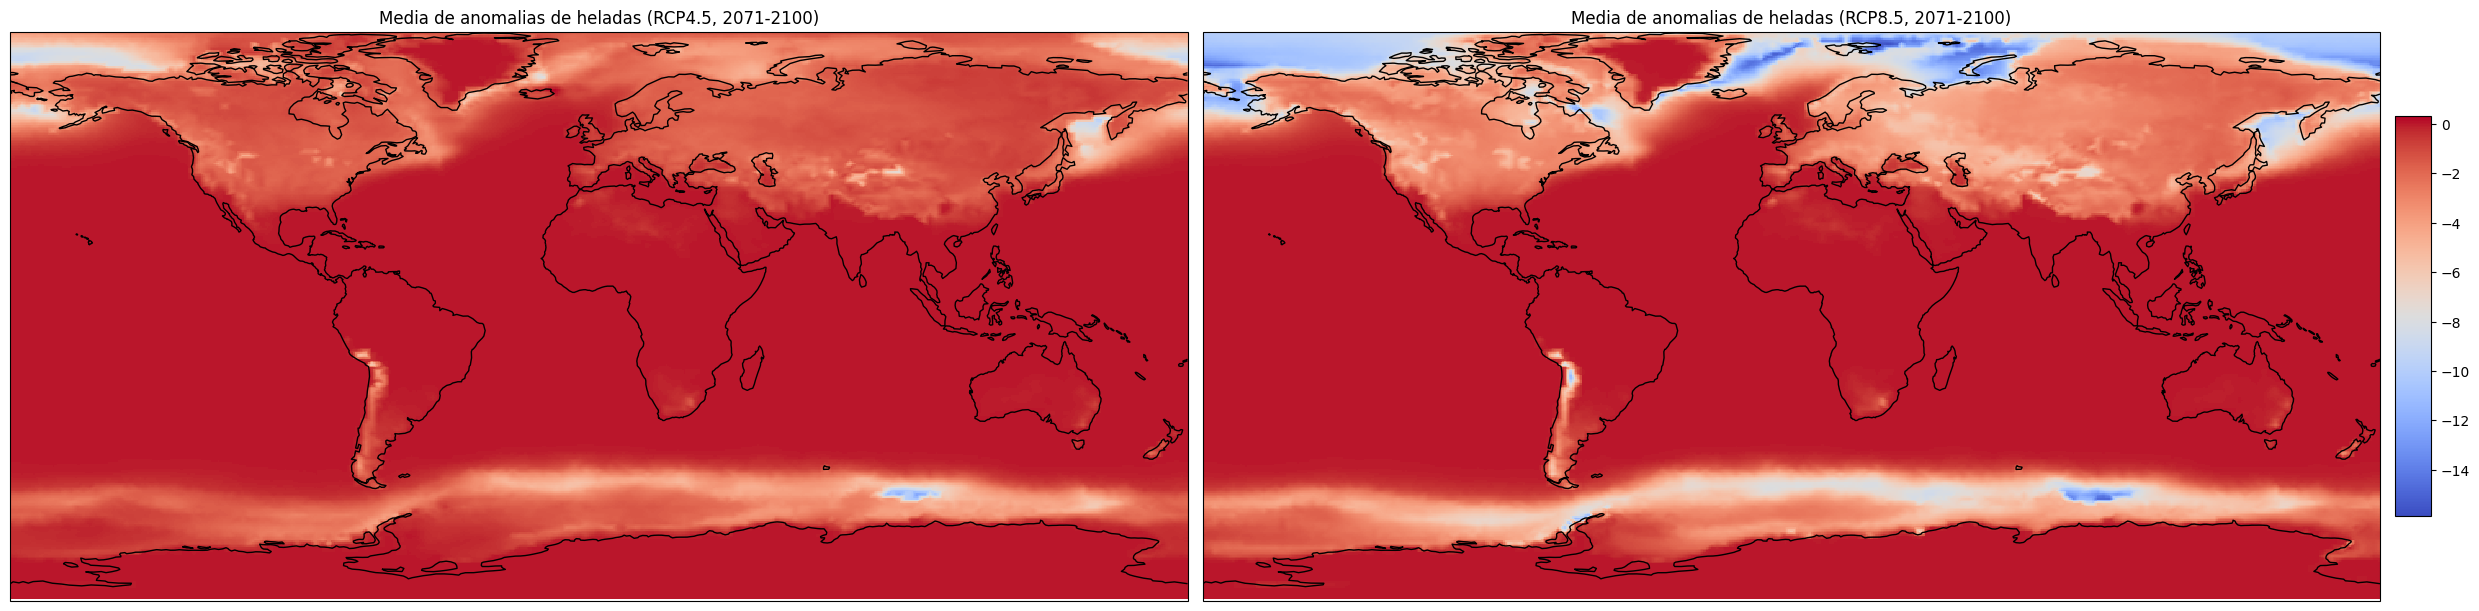

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np


end_century_anomalies_rcp45 = anomalies_rcp45.sel(time=slice('2071-01-01', '2100-12-31'))
end_century_anomalies_rcp85 = anomalies_rcp85.sel(time=slice('2071-01-01', '2100-12-31'))

mean_end_century_anomalies_rcp45 = end_century_anomalies_rcp45.mean(dim='time')
mean_end_century_anomalies_rcp85 = end_century_anomalies_rcp85.mean(dim='time')


vmin = min(mean_end_century_anomalies_rcp45.min(), mean_end_century_anomalies_rcp85.min())
vmax = max(mean_end_century_anomalies_rcp45.max(), mean_end_century_anomalies_rcp85.max())


fig, axes = plt.subplots(1, 2, figsize=(24, 8), subplot_kw={'projection': ccrs.PlateCarree()})


ax1 = axes[0]
plot1 = mean_end_century_anomalies_rcp45.plot(ax=ax1, cmap='coolwarm', transform=ccrs.PlateCarree(), add_colorbar=False, vmin=vmin, vmax=vmax)
ax1.coastlines()
ax1.set_title('Media de anomalias de heladas (RCP4.5, 2071-2100)')
ax1.set_xlabel('longitude')
ax1.set_ylabel('latitude')



ax2 = axes[1]
plot2 = mean_end_century_anomalies_rcp85.plot(ax=ax2, cmap='coolwarm', transform=ccrs.PlateCarree(), add_colorbar=False, vmin=vmin, vmax=vmax)
ax2.coastlines()
ax2.set_title('Media de anomalias de heladas (RCP8.5, 2071-2100)')
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')

cbar_ax = fig.add_axes([1,0.25, 0.015,0.5])
cbar = fig.colorbar(plot1, cax=cbar_ax)

plt.tight_layout()
plt.show()

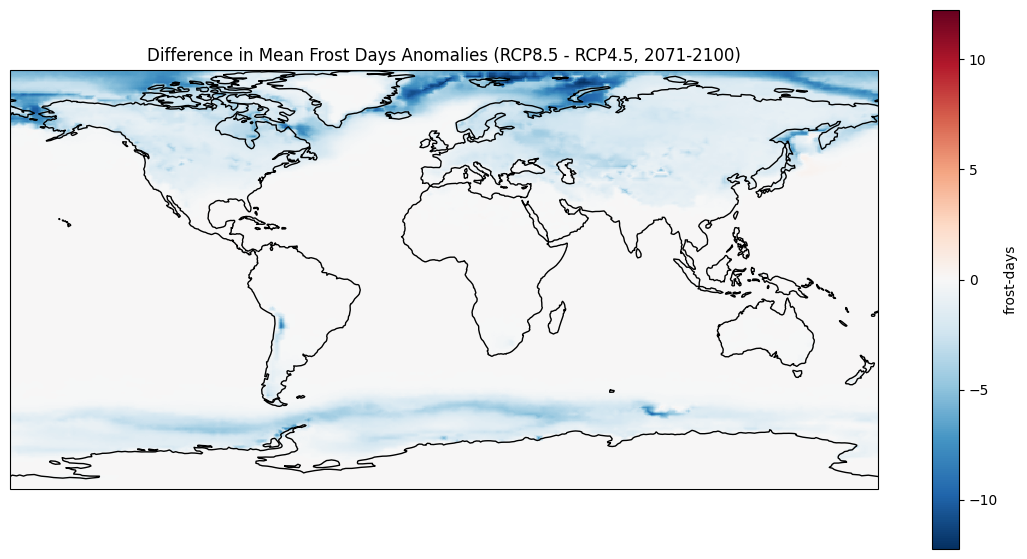

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

difference_anomalies = mean_end_century_anomalies_rcp85 - mean_end_century_anomalies_rcp45


plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
difference_anomalies.plot(ax=ax, cmap='RdBu_r', transform=ccrs.PlateCarree())
ax.coastlines()
plt.title('Difference in Mean Frost Days Anomalies (RCP8.5 - RCP4.5, 2071-2100)')
plt.show()

In [ ]:
import xarray as xr


file_path_ipsl_rcp45 = '/content/frost-days_monthly-sum_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0.nc'
file_path_ipsl_rcp85 = '/content/frost-days_monthly-sum_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0.nc'


ds_ipsl_rcp45 = xr.open_dataset(file_path_ipsl_rcp45)
ds_ipsl_rcp85 = xr.open_dataset(file_path_ipsl_rcp85)



Datasets loaded successfully.


Now I will calculate the historical anomalies for each dataset.

In [ ]:

anomalies_ipsl_rcp45 = ds_ipsl_rcp45['frost-days'] - ds_ipsl_rcp45['frost-days'].mean(dim='time')
anomalies_ipsl_rcp85 = ds_ipsl_rcp85['frost-days'] - ds_ipsl_rcp85['frost-days'].mean(dim='time')


Ahora se calculan las anomalias para el periodo ya seleccionado

In [ ]:

mean_end_century_anomalies_ipsl_rcp45 = anomalies_ipsl_rcp45.sel(time=slice('2071-01-01', '2100-12-31')).mean(dim='time')
mean_end_century_anomalies_ipsl_rcp85 = anomalies_ipsl_rcp85.sel(time=slice('2071-01-01', '2100-12-31')).mean(dim='time')



NameError: name 'anomalies_ipsl_rcp45' is not defined

 Finalmente, se grafican la media para final de siglo para el modelo 'ipsl_cm5a_mr' bajo ambos escenarios('rcp45' y 'rcp85') y su diferencia

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np


vmin = min(mean_end_century_anomalies_ipsl_rcp45.min(), mean_end_century_anomalies_ipsl_rcp85.min())
vmax = max(mean_end_century_anomalies_ipsl_rcp45.max(), mean_end_century_anomalies_ipsl_rcp85.max())


fig, axes = plt.subplots(1, 2, figsize=(24, 8), subplot_kw={'projection': ccrs.PlateCarree()})

ax1 = axes[0]
plot1 = mean_end_century_anomalies_ipsl_rcp45.plot(ax=ax1, cmap='coolwarm', transform=ccrs.PlateCarree(), add_colorbar=False, vmin=vmin, vmax=vmax)
ax1.coastlines()
ax1.set_title('Mean Frost Days Anomalies (ipsl_cm5a_mr, RCP4.5, 2071-2100)')
ax1.set_xlabel('longitude')
ax1.set_ylabel('latitude')
ax2 = axes[1]
plot2 = mean_end_century_anomalies_ipsl_rcp85.plot(ax=ax2, cmap='coolwarm', transform=ccrs.PlateCarree(), add_colorbar=False, vmin=vmin, vmax=vmax)
ax2.coastlines()
ax2.set_title('Mean Frost Days Anomalies (ipsl_cm5a_mr, RCP8.5, 2071-2100)')
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')

cbar_ax = fig.add_axes([1,0.25, 0.015,0.5])
cbar = fig.colorbar(plot1, cax=cbar_ax, label='Frost Days Anomalies')

plt.tight_layout()
plt.show()

Lo mismo pero para todo el siglo

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


difference_anomalies_ipsl = mean_end_century_anomalies_ipsl_rcp85 - mean_end_century_anomalies_ipsl_rcp45


plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
difference_anomalies_ipsl.plot(ax=ax, cmap='RdBu_r', transform=ccrs.PlateCarree())
ax.coastlines()
plt.title('Difference in Mean Frost Days Anomalies (ipsl_cm5a_mr, RCP8.5 - RCP4.5, 2071-2100)')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

# Load the datasets for ACCESS1.0 model if not already loaded
try:
    ds_rcp45
    ds_rcp85
except NameError:
    ds_rcp45 = xr.open_dataset('/content/frost-days_monthly-sum_access1-0_rcp45_r1i1p1_1950-2100_v1.0.nc')
    ds_rcp85 = xr.open_dataset('/content/frost-days_monthly-sum_access1-0_rcp85_r1i1p1_1950-2100_v1.0.nc')


# Calculate anomalies for ACCESS1.0 model
anomalies_rcp45 = ds_rcp45['frost-days'] - ds_rcp45['frost-days'].mean(dim='time')
anomalies_rcp85 = ds_rcp85['frost-days'] - ds_rcp85['frost-days'].mean(dim='time')


# Select the end-of-century period (2071-2100)
end_century_anomalies_rcp45 = anomalies_rcp45.sel(time=slice('2071-01-01', '2100-12-31'))
end_century_anomalies_rcp85 = anomalies_rcp85.sel(time=slice('2071-01-01', '2100-12-31'))

# Calculate the temporal mean for the end-of-century period
mean_end_century_anomalies_rcp45 = end_century_anomalies_rcp45.mean(dim='time')
mean_end_century_anomalies_rcp85 = end_century_anomalies_rcp85.mean(dim='time')

# Determine a common color scale for both plots
vmin = min(mean_end_century_anomalies_rcp45.min().item(), mean_end_century_anomalies_rcp85.min().item())
vmax = max(mean_end_century_anomalies_rcp45.max().item(), mean_end_century_anomalies_rcp85.max().item())

# Create a figure with two subplots in a grid, with increased figsize
fig, axes = plt.subplots(1, 2, figsize=(24, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot RCP4.5 mean anomalies on the first subplot
ax1 = axes[0]
plot1 = mean_end_century_anomalies_rcp45.plot(ax=ax1, cmap='coolwarm', transform=ccrs.PlateCarree(), add_colorbar=False, vmin=vmin, vmax=vmax)
ax1.coastlines()
ax1.set_title('Media de anomalias de heladas (ACCESS1.0, RCP4.5, 2071-2100)')
ax1.set_xlabel('longitude')
ax1.set_ylabel('latitude')


# Plot RCP8.5 mean anomalies on the second subplot
ax2 = axes[1]
plot2 = mean_end_century_anomalies_rcp85.plot(ax=ax2, cmap='coolwarm', transform=ccrs.PlateCarree(), add_colorbar=False, vmin=vmin, vmax=vmax)
ax2.coastlines()
ax2.set_title('Media de anomalias de heladas (ACCESS1.0, RCP8.5, 2071-2100)')
ax2.set_xlabel('longitude')
ax2.set_ylabel('latitude')

# Add a shared colorbar
cbar_ax = fig.add_axes([1,0.25, 0.015,0.5]) # [left, bottom, width, height]
cbar = fig.colorbar(plot1, cax=cbar_ax, label='Frost Days Anomalies')

plt.tight_layout()
plt.show()

## Calculate and plot the difference in anomalies between models for rcp4.5

### Subtask:
Calculate and plot the difference in mean end-of-century anomalies between the ACCESS1.0 and ipsl_cm5a_mr models for the RCP4.5 scenario.


**Reasoning**:
Calculate and plot the difference in mean end-of-century anomalies between the ACCESS1.0 and ipsl_cm5a_mr models for the RCP4.5 scenario, following steps 1-7 of the instructions.



In [ ]:
# Calculate the difference between mean_end_century_anomalies_rcp45 (from ACCESS1.0) and mean_end_century_anomalies_ipsl_rcp45 (from ipsl_cm5a_mr)
difference_rcp45 = mean_end_century_anomalies_rcp45 - mean_end_century_anomalies_ipsl_rcp45

# Create a figure for plotting with a specified size
plt.figure(figsize=(14, 7))

# Add a subplot to the figure with a PlateCarree projection from cartopy.crs
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the calculated difference
difference_rcp45.plot(ax=ax, cmap='RdBu_r', transform=ccrs.PlateCarree())

# Add coastlines to the plot
ax.coastlines()

# Set the title of the plot
plt.title('Difference in Mean Frost Days Anomalies (ACCESS1.0 - ipsl_cm5a_mr, RCP4.5, 2071-2100)')

# Display the plot
plt.show()

**Reasoning**:
The variable `mean_end_century_anomalies_ipsl_rcp45` was not defined in the current session. I need to load the ipsl_cm5a_mr model data, calculate the anomalies, select the end-of-century period, and calculate the mean anomalies for the RCP4.5 scenario before I can calculate the difference with the ACCESS1.0 model.



In [ ]:
# Define the file path for the ipsl_cm5a_mr model and rcp45 scenario
file_path_ipsl_rcp45 = '/content/frost-days_monthly-sum_ipsl-cm5a-mr_rcp45_r1i1p1_1950-2100_v1.0.nc'

# Open the dataset
ds_ipsl_rcp45 = xr.open_dataset(file_path_ipsl_rcp45)

# Calculate historical anomalies for the dataset
anomalies_ipsl_rcp45 = ds_ipsl_rcp45['frost-days'] - ds_ipsl_rcp45['frost-days'].mean(dim='time')

# Select the end-of-century period (2071-2100) and calculate the temporal mean
mean_end_century_anomalies_ipsl_rcp45 = anomalies_ipsl_rcp45.sel(time=slice('2071-01-01', '2100-12-31')).mean(dim='time')

# Calculate the difference between mean_end_century_anomalies_rcp45 (from ACCESS1.0) and mean_end_century_anomalies_ipsl_rcp45 (from ipsl_cm5a_mr)
difference_rcp45 = mean_end_century_anomalies_rcp45 - mean_end_century_anomalies_ipsl_rcp45

# Create a figure for plotting with a specified size
plt.figure(figsize=(14, 7))

# Add a subplot to the figure with a PlateCarree projection from cartopy.crs
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the calculated difference
difference_rcp45.plot(ax=ax, cmap='RdBu_r', transform=ccrs.PlateCarree())

# Add coastlines to the plot
ax.coastlines()

# Set the title of the plot
plt.title('Difference in Mean Frost Days Anomalies (ACCESS1.0 - ipsl_cm5a_mr, RCP4.5, 2071-2100)')

# Display the plot
plt.show()

## Se calcula y grafica la diferencia en anomalias entre ambos modelos para el escenario rcp8.5


In [ ]:
ds_ipsl_rcp85 = xr.open_dataset('/content/frost-days_monthly-sum_ipsl-cm5a-mr_rcp85_r1i1p1_1950-2100_v1.0.nc')

In [ ]:
anomalies_ipsl_rcp85 = ds_ipsl_rcp85['frost-days'] - ds_ipsl_rcp85['frost-days'].mean(dim='time')
mean_end_century_anomalies_ipsl_rcp85 = anomalies_ipsl_rcp85.sel(time=slice('2071-01-01', '2100-12-31')).mean(dim='time')
difference_rcp85 = mean_end_century_anomalies_rcp85 - mean_end_century_anomalies_ipsl_rcp85

plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
difference_rcp85.plot(ax=ax, cmap='RdBu_r', transform=ccrs.PlateCarree())
ax.coastlines()
plt.title('Difference in Mean Frost Days Anomalies (ACCESS1.0 - ipsl_cm5a_mr, RCP8.5, 2071-2100)')
plt.show()

## Resumen:

### Hallazgos Clave del Análisis de Datos

* El análisis se centró en las anomalías de días de helada.
* Para el modelo ACCESS1.0, el escenario RCP8.5 proyecta una mayor disminución en los días de helada para fines de siglo (2071-2100) en comparación con el escenario RCP4.5, como se muestra en las gráficas de anomalías medias. Los patrones espaciales de la disminución son similares en ambos escenarios para este modelo, con disminuciones más significativas en latitudes medias a altas.
* Comparando los modelos ACCESS1.0 e IPSL-CM5A-MR para el escenario RCP4.5, existen diferencias espaciales en las anomalías proyectadas de días de helada a fines de siglo. La gráfica de la diferencia (ACCESS1.0 - IPSL-CM5A-MR) destaca las regiones donde los modelos divergen en sus proyecciones.
* De manera similar, para el escenario RCP8.5, la gráfica de diferencia entre ACCESS1.0 e IPSL-CM5A-MR muestra áreas de notable desacuerdo en la magnitud de los cambios proyectados en los días de helada para fines de siglo.


* Las diferencias observadas entre los modelos para ambos escenarios resaltan la incertidumbre en las proyecciones climáticas futuras, particularmente con respecto a la magnitud de los cambios en los días de helada en regiones específicas. Un análisis adicional podría implicar examinar otros modelos para comprender el rango de proyecciones.
* Investigar las razones de las diferencias entre los modelos ACCESS1.0 e IPSL-CM5A-MR (por ejemplo, diferencias en la física del modelo, parametrizaciones o resolución) podría proporcionar información valiosa sobre las fuentes de incertidumbre en las proyecciones de días de helada.